In [55]:
from os.path import basename, splitext, exists, join
from os import listdir

import dask.array as da
import numpy as np
import matplotlib.pyplot as plt
from dask_image import imread
from sm_particle_counter.utils import *

stack = imread.imread("D:/2023-06 injection test data/test_070.tif") #[..., 0:1152]

In [56]:
stack

dask.array<_map_read_frame, shape=(700, 100, 2304), dtype=uint16, chunksize=(1, 100, 2304), chunktype=numpy.ndarray>

In [5]:
def intersection(lst1, lst2):
    if lst1:
        return list(set(lst1) & set(lst2))
    else:
        return lst2

req_channels = None
avail_channels = ["Cy2", "Cy5", "Cy3"]

intersection(req_channels, avail_channels)

['Cy2', 'Cy5', 'Cy3']

In [58]:

thresh = dict()
for channel, img in get_channels(stack[1]).items():
    # Threshold calculation
    bg, q25, q75 = np.quantile(img.compute(), [0.05, 0.25, 0.75])
    iqr = q75 - q25
    thresh[channel] = bg + 5 * iqr

In [59]:
thresh

{'Cy3': 469.0, 'Cy5': 458.0}

In [60]:
thresh_img = np.ones_like(stack[0]) * thresh['Cy3']
if get_num_channels(thresh_img) == 2:
    thresh_img[Cy5(thresh_img)] = thresh['Cy5']

In [61]:
from scipy.ndimage import maximum_filter
def segment_particles(layer, threshold):
    """
    Threshold the image to select bright particles and apply maximum filter
    to erode background around them, leaving only a single white pixel per
    particle.
    """
    masked_layer = layer * (layer > threshold)
    return maximum_filter(layer, size=3) == masked_layer

In [62]:
segmented_stack = stack[200:500].map_blocks(segment_particles, threshold=thresh_img)
p = segmented_stack.sum(axis=-2).compute()

In [63]:
N = dict()
for channel, img in get_channels(p).items():
    N[channel] = img.sum(axis=-1)

In [71]:
segmented_stack.sum(axis=-2)

dask.array<sum-aggregate, shape=(300, 2304), dtype=int32, chunksize=(1, 2304), chunktype=numpy.ndarray>

In [77]:
from os.path import splitext as a
a("C:/blah/file.tex")

('C:/blah/file', '.tex')

In [65]:
import matplotlib.pyplot as plt

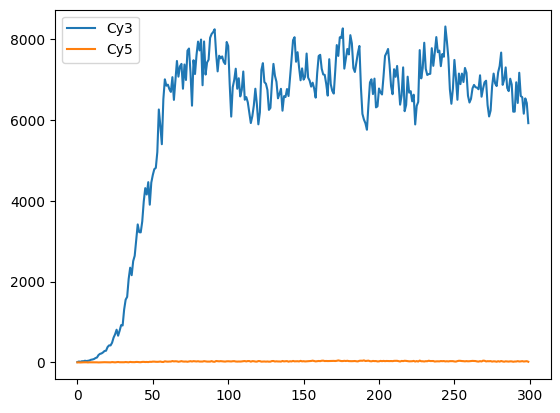

In [66]:
for channel, Y in N.items():
    plt.plot(Y, label = channel)
plt.legend()
plt.show()

In [67]:
import pandas as pd

In [69]:
pd.DataFrame.from_dict(N).to_csv("test_data_particles.csv")

In [24]:

for f in listdir(dir):
    name, ext = splitext(f)

    csv_name = f"{name}_TIRF_intensity.csv"
    plt_name = f"{name}_TIRF_intensity.png"
    # TODO: change the logic. If CSV file is not there, create it.
    # If it is there but png is absent, create PNG based on data from CSV
    if ".tif" in ext.lower():
        if not exists(join(dir, csv_name)):
            print("Analyzing TIFF file " + f)

    if ".csv" in ext.lower():
        if not exists(join(dir, plt_name)):
            print("Plotting  CSV  file " + f)

Analyzing TIFF file test_001.tif
Analyzing TIFF file test_002.tif
Analyzing TIFF file test_003.tif
Analyzing TIFF file test_004.tif


In [17]:
f"{name}_TIRF_intensity.csv"

'test_004_TIRF_intensity.csv'

In [5]:
get_num_channels(stack)

1

In [14]:
stack = da.from_array(np.zeros((3, 1024, 2048)))

In [17]:
get_channels(stack)["Cy5"]

dask.array<getitem, shape=(3, 1024, 1024), dtype=float64, chunksize=(3, 1024, 1024), chunktype=numpy.ndarray>

In [8]:
t = np.zeros_like(stack[0])
t[:, :200] = 490
t[:, 200:] = 400

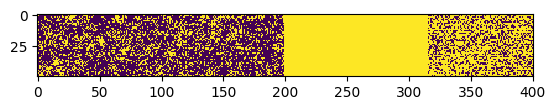

In [9]:
plt.imshow(stack[70] > t, interpolation="none");

In [10]:
stack > t

dask.array<gt, shape=(150, 50, 401), dtype=bool, chunksize=(1, 50, 401), chunktype=numpy.ndarray>

In [11]:
def s(ar):
    return np.array([ar[..., :200].sum(axis=(1,2)), ar[..., 200:].sum(axis=(1,2))])

In [12]:
stack.map_blocks(s)

dask.array<s, shape=(150, 50, 401), dtype=uint32, chunksize=(1, 50, 401), chunktype=numpy.ndarray>

In [24]:
get_channels(stack[0])['Cy3']

type: Provided data have incorrect shape

In [22]:
from sm_particle_counter.utils import ensure_array, is_array
is_array(stack)

True

In [19]:
stack[0].shape

(50, 401)

In [7]:
import pandas as pd

In [8]:
d = pd.DataFrame.from_dict(dict())

In [12]:
d.ndim

2

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

f = r"D:\2023-06 injection test data\test_070_N_particles.csv"
df = pd.read_csv(f)

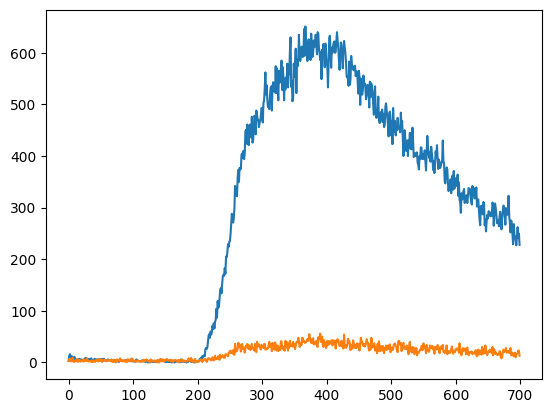

In [9]:
plt.plot(df["Cy3"])
plt.plot(df["Cy5"])